<a href="https://colab.research.google.com/github/alvarischa/Hate-Speech-Text-Mining/blob/main/Text%20Mining%20Hate%20Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import re
import csv
import string
import nltk
import os

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
data = pd.read_csv('https://raw.githubusercontent.com/alvarischa/Hate-Speech-Text-Mining/main/data%20hate%20speech.csv')

In [56]:
data

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
708,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,HS,"Betul bang hancurkan merka bang, musnahkan chi..."
710,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,HS,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


In [66]:
Data=[]
for row in data['Tweet']:
    
#--------------------------------------Remove punctuation and non-ascii char------------------------------
    strip_unicode = re.compile("([^-_a-zA-Z0-9!@#%&=,/'\";:~`\$\^\*\(\)\+\[\]\.\{\}\|\?\<\>\\]+|[^\s]+)")
    text = strip_unicode.sub('', row)
    text = re.sub("\d+","",text)
    text = "".join((char for char in text if char not in string.punctuation))
    text = row.replace("RT", "") 
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) 
    text = re.sub(r'https?:\\[^ ]+', '', text) 
    text = re.sub(r'[\W+|_]+', ' ', text).lower() 

#--------------------------------------Case Folding Step--------------------------------------------------
    Data.append(text.lower())
    

In [67]:
Data

[' fadli zon minta mendagri segera menonaktifkan ahok jadi gubernur dki ',
 ' mereka terus melukai aksi dalam rangka memenjarakan ahok atau ahok gagal dalam pilkada ',
 'sylvi bagaimana gurbernur melakukan kekerasan perempuan buktinya banyak ibu2 mau foto bareng debatfinalpilkadajkt',
 'ahmad dhani tak puas debat pilkada masalah jalan di bekasi belum sempat terungkap ',
 ' waspada ktp palsu kawal pilkada ',
 ' masih bnyak hal agamis yg bisa dibahas kenapa ke pilkada terus apa tingkat keimanan anda cuma sebatas pilkada ',
 ' apa maksud pernyataan anda apa anda mengaminkan kriminalisasi ahok hati2 jg dg mulutmu pak ',
 'ahok akan integrasikan transportasi publik dengan sistem single ticketing u2026 infotribun',
 'ahok mampu melawan korupsi di ibukota bangun infrastruktur mencoba memperbaiki dengan berbagai trobosan dan works well ',
 'awasi kecurangan pilkada agus sylvi pakai aplikasi ini ',
 'bisa gak kita seperti jokowi dan ahok aku kalem kamu tegas saling melengkapi ',
 'bos mau makan

In [68]:
pip install Sastrawi

In [88]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


# create stemmer
stemmer_id = StemmerFactory().create_stemmer()
text_id_stemmed = [stemmer_id.stem(i) for i in Data]

In [91]:
text_id_stemmed

['fadli zon minta mendagri segera nonaktif ahok jadi gubernur dki',
 'mereka terus luka aksi dalam rangka penjara ahok atau ahok gagal dalam pilkada',
 'sylvi bagaimana gurbernur laku keras perempuan bukti banyak ibu2 mau foto bareng debatfinalpilkadajkt',
 'ahmad dhani tak puas debat pilkada masalah jalan di bekas belum sempat ungkap',
 'waspada ktp palsu kawal pilkada',
 'masih bnyak hal agam yg bisa bahas kenapa ke pilkada terus apa tingkat iman anda cuma batas pilkada',
 'apa maksud nyata anda apa anda amin kriminalisasi ahok hati2 jg dg mulut pak',
 'ahok akan integrasi transportasi publik dengan sistem single ticketing u2026 infotribun',
 'ahok mampu lawan korupsi di ibukota bangun infrastruktur coba baik dengan bagai trobosan dan works well',
 'awas curang pilkada agus sylvi pakai aplikasi ini',
 'bisa gak kita seperti jokowi dan ahok aku kalem kamu tegas saling lengkap',
 'bos mau makan di istana ga di undang noh makan di istana gebang tapi',
 'cuti habis ahok jadi gubernur dki

In [71]:
stop=[]
for i in text_id_stemmed:
  word_tokens = word_tokenize(i)

In [72]:
# Load library
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')
stop=[]
for i in text_id_stemmed:
  word_tokens = word_tokenize(i)
  stopword = [word for word in word_tokens if word not in stop_words]
  stop.append(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
stop

[['fadli', 'zon', 'mendagri', 'nonaktif', 'ahok', 'gubernur', 'dki'],
 ['luka', 'aksi', 'rangka', 'penjara', 'ahok', 'ahok', 'gagal', 'pilkada'],
 ['sylvi',
  'gurbernur',
  'laku',
  'keras',
  'perempuan',
  'bukti',
  'ibu2',
  'foto',
  'bareng',
  'debatfinalpilkadajkt'],
 ['ahmad', 'dhani', 'puas', 'debat', 'pilkada', 'jalan', 'bekas'],
 ['waspada', 'ktp', 'palsu', 'kawal', 'pilkada'],
 ['bnyak',
  'agam',
  'yg',
  'bahas',
  'pilkada',
  'tingkat',
  'iman',
  'batas',
  'pilkada'],
 ['maksud',
  'nyata',
  'amin',
  'kriminalisasi',
  'ahok',
  'hati2',
  'jg',
  'dg',
  'mulut'],
 ['ahok',
  'integrasi',
  'transportasi',
  'publik',
  'sistem',
  'single',
  'ticketing',
  'u2026',
  'infotribun'],
 ['ahok',
  'lawan',
  'korupsi',
  'ibukota',
  'bangun',
  'infrastruktur',
  'coba',
  'trobosan',
  'works',
  'well'],
 ['awas', 'curang', 'pilkada', 'agus', 'sylvi', 'pakai', 'aplikasi'],
 ['gak', 'jokowi', 'ahok', 'kalem', 'lengkap'],
 ['bos',
  'makan',
  'istana',
  'ga',

In [74]:
# Removing Stopwords
text_en_filtered =[]
for w in text_id_stemmed:
    if w not in stop:
        text_en_filtered.append(w)

In [75]:
text_en_filtered

['fadli zon minta mendagri segera nonaktif ahok jadi gubernur dki',
 'mereka terus luka aksi dalam rangka penjara ahok atau ahok gagal dalam pilkada',
 'sylvi bagaimana gurbernur laku keras perempuan bukti banyak ibu2 mau foto bareng debatfinalpilkadajkt',
 'ahmad dhani tak puas debat pilkada masalah jalan di bekas belum sempat ungkap',
 'waspada ktp palsu kawal pilkada',
 'masih bnyak hal agam yg bisa bahas kenapa ke pilkada terus apa tingkat iman anda cuma batas pilkada',
 'apa maksud nyata anda apa anda amin kriminalisasi ahok hati2 jg dg mulut pak',
 'ahok akan integrasi transportasi publik dengan sistem single ticketing u2026 infotribun',
 'ahok mampu lawan korupsi di ibukota bangun infrastruktur coba baik dengan bagai trobosan dan works well',
 'awas curang pilkada agus sylvi pakai aplikasi ini',
 'bisa gak kita seperti jokowi dan ahok aku kalem kamu tegas saling lengkap',
 'bos mau makan di istana ga di undang noh makan di istana gebang tapi',
 'cuti habis ahok jadi gubernur dki

In [76]:
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')
lema = []
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

# 2. Lemmatize a Sentence with the appropriate POS tag
for i in text_en_filtered:
  #print("Sentence before:", i)
  sentence = i
  #sentence = sent_tokenize(i)
  p = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)]
  lema.append(p)
  

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [77]:
lema

[['fadli',
  'zon',
  'minta',
  'mendagri',
  'segera',
  'nonaktif',
  'ahok',
  'jadi',
  'gubernur',
  'dki'],
 ['mereka',
  'terus',
  'luka',
  'aksi',
  'dalam',
  'rangka',
  'penjara',
  'ahok',
  'atau',
  'ahok',
  'gagal',
  'dalam',
  'pilkada'],
 ['sylvi',
  'bagaimana',
  'gurbernur',
  'laku',
  'kera',
  'perempuan',
  'bukti',
  'banyak',
  'ibu2',
  'mau',
  'foto',
  'bareng',
  'debatfinalpilkadajkt'],
 ['ahmad',
  'dhani',
  'tak',
  'puas',
  'debat',
  'pilkada',
  'masalah',
  'jalan',
  'di',
  'bekas',
  'belum',
  'sempat',
  'ungkap'],
 ['waspada', 'ktp', 'palsu', 'kawal', 'pilkada'],
 ['masih',
  'bnyak',
  'hal',
  'agam',
  'yg',
  'bisa',
  'bahas',
  'kenapa',
  'ke',
  'pilkada',
  'terus',
  'apa',
  'tingkat',
  'iman',
  'anda',
  'cuma',
  'bata',
  'pilkada'],
 ['apa',
  'maksud',
  'nyata',
  'anda',
  'apa',
  'anda',
  'amin',
  'kriminalisasi',
  'ahok',
  'hati2',
  'jg',
  'dg',
  'mulut',
  'pak'],
 ['ahok',
  'akan',
  'integrasi',
  'tra

In [78]:
df = pd.DataFrame(list(zip(lema)), columns =['Tweet'])
korpus = []
for i in df['Tweet']: 
  text = re.sub("\,+","",str(i))
  text = "".join((char for char in text if char not in string.punctuation))
  korpus.append(text)

In [79]:
korpus

['fadli zon minta mendagri segera nonaktif ahok jadi gubernur dki',
 'mereka terus luka aksi dalam rangka penjara ahok atau ahok gagal dalam pilkada',
 'sylvi bagaimana gurbernur laku kera perempuan bukti banyak ibu2 mau foto bareng debatfinalpilkadajkt',
 'ahmad dhani tak puas debat pilkada masalah jalan di bekas belum sempat ungkap',
 'waspada ktp palsu kawal pilkada',
 'masih bnyak hal agam yg bisa bahas kenapa ke pilkada terus apa tingkat iman anda cuma bata pilkada',
 'apa maksud nyata anda apa anda amin kriminalisasi ahok hati2 jg dg mulut pak',
 'ahok akan integrasi transportasi publik dengan sistem single ticket u2026 infotribun',
 'ahok mampu lawan korupsi di ibukota bangun infrastruktur coba baik dengan bagai trobosan dan work well',
 'awas curang pilkada agus sylvi pakai aplikasi ini',
 'bisa gak kita seperti jokowi dan ahok aku kalem kamu tegas saling lengkap',
 'bos mau makan di istana ga di undang noh makan di istana gebang tapi',
 'cuti habis ahok jadi gubernur dki lagi 

In [80]:
df = pd.DataFrame(list(zip(data['Label'], korpus)), columns =['Label', 'Tweet'])

In [81]:
df

,Label,Tweet
0,Non_HS,fadli zon minta mendagri segera nonaktif ahok ...
1,Non_HS,mereka terus luka aksi dalam rangka penjara ah...
2,Non_HS,sylvi bagaimana gurbernur laku kera perempuan ...
3,Non_HS,ahmad dhani tak puas debat pilkada masalah jal...
4,Non_HS,waspada ktp palsu kawal pilkada
...,...,...
708,HS,muka si babi ahok tuh yg mirip serbet lantai
709,HS,betul bang hancur merka bang musnah china babi...
710,HS,sapa yg bilang ahok anti korupsi klo grombolan...
711,HS,gw juga ngimpi sentilin biji babi ahok pcetar ...


In [93]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
feature = df['Tweet']
target = df['Label']
X_train, X_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=1)
 
# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(499,)
(214,)
(499,)
(214,)


In [94]:
X_test

546    tangkap ahok skrng juga koruptor reklamasi jak...
223    bincang tarik di quick count pilkada 2017 sama...
403    terima kasih pak basuki sampai kapan pun sejar...
8      ahok mampu lawan korupsi di ibukota bangun inf...
394    dari lahir di jakarta sampe detik ini baru gue...
                             ...                        
681    iklanahokjahat bagaimana klo kita ganyang bene...
268    walaupun arti teman setia harus lebih hindar k...
307    mahfud md heran uu pemda sangat jelas tapi men...
318    bangga masih milik putra bangsa seperti pak ba...
224    syukur tutup kampanye hari ini dengan doa agar...
Name: Tweet, Length: 214, dtype: object

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=20, random_state=0)
randomforestt = Pipeline([('vectorizer',tfidf_vectorizer)
                 ,('classifier',randomforest )])

randomforestt.fit(X_train,y_train)
y_pred=randomforestt.predict(X_test)

In [115]:
from sklearn import metrics
cm_grf = metrics.confusion_matrix(y_test, y_pred)
cm_grf

array([[125,   5],
       [ 31,  53]])

In [116]:
print("Random Forest Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Random Forest Precision:", metrics.precision_score(y_test, y_pred))
print("Random Forest Recall:", metrics.recall_score(y_test, y_pred))
print("Random Forest F1 Score:",metrics.f1_score (y_test, y_pred))
print("Random Forest Cohens Kappa Score:",metrics.cohen_kappa_score (y_test, y_pred))

Random Forest Test set Accuracy:  0.8317757009345794
Random Forest Precision: 0.9137931034482759
Random Forest Recall: 0.6309523809523809
Random Forest F1 Score: 0.7464788732394366
Random Forest Cohens Kappa Score: 0.626816508428599


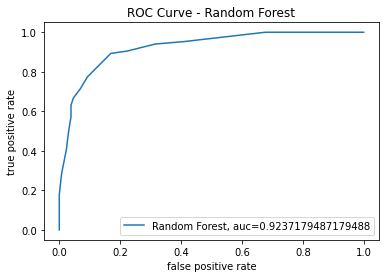

In [119]:
import matplotlib.pyplot as plt
y_pred_rf_proba = randomforestt.predict_proba(X_test)[::,1]
fprrf, tprrf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
aucrf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
plt.plot(fprrf,tprrf,label="Random Forest, auc="+str(aucrf))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()